In [2]:
import cv2
import keras
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Dense, Softmax, BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten, Activation

import matplotlib.pyplot as plt
%matplotlib notebook

# 1、加载数据

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2、查看数据

In [4]:
np.set_printoptions(threshold=np.inf)

# 数据集的大小
train_size = x_train.shape[0]
test_size = x_test.shape[0]

print("训练集的大小: {}".format(train_size))
print("测试集的大小: {}".format(test_size))

训练集的大小: 60000
测试集的大小: 10000


In [5]:
# 查看数据集的维度
print("训练集特征的维度: {}".format(x_train.shape))
print("测试集特征的维度: {}".format(x_test.shape))
print("训练集目标的维度: {}".format(y_train.shape))
print("测试集目标的维度: {}".format(y_test.shape))

训练集特征的维度: (60000, 28, 28)
测试集特征的维度: (10000, 28, 28)
训练集目标的维度: (60000,)
测试集目标的维度: (10000,)


<IPython.core.display.Javascript object>


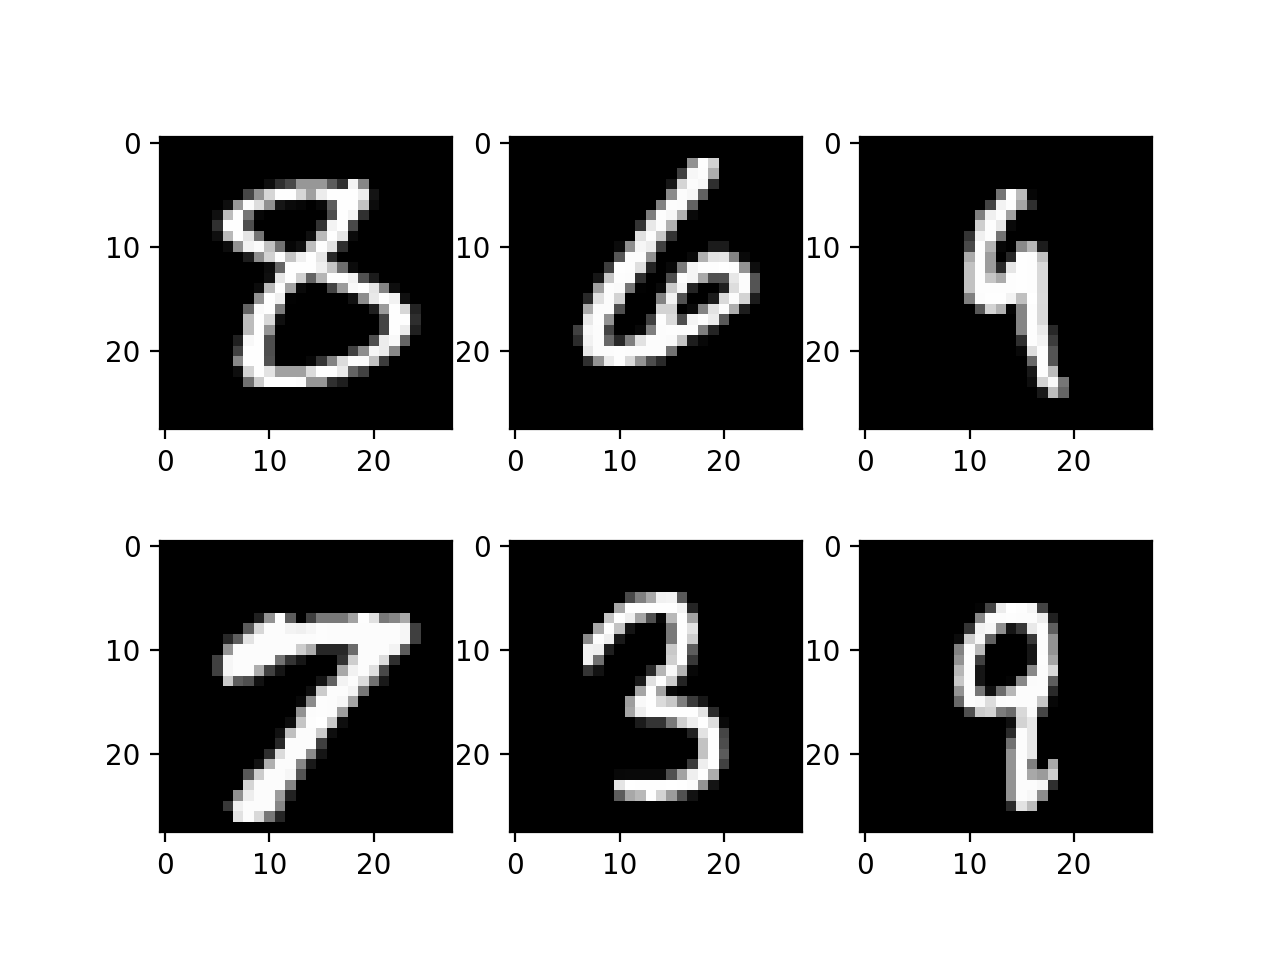

In [6]:
# 数据可视化
display_num = 6  # 可视化数据的个数
inds = np.random.choice(len(x_train), display_num)

for i in range(display_num):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[inds[i]], cmap=plt.get_cmap('gray'))

# plt.subplot(231)
# random_num = np.random.randint(0,len(x_train))
# plt.imshow(x_train[random_num])

# plt.subplot(232)
# random_num = np.random.randint(0,len(x_train))
# plt.imshow(x_train[random_num] , cmap=plt.get_cmap('gray'))

# plt.subplot(233)
# random_num = np.random.randint(0,len(x_train))
# plt.imshow(x_train[random_num] , cmap=plt.get_cmap('gray'))

# plt.subplot(234)
# random_num = np.random.randint(0,len(x_train))
# plt.imshow(x_train[random_num] , cmap=plt.get_cmap('gray'))

# plt.subplot(235)
# random_num = np.random.randint(0,len(x_train))
# plt.imshow(x_train[random_num] , cmap=plt.get_cmap('gray'))

# plt.subplot(236)
# random_num = np.random.randint(0,len(x_train))
# plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray')) 

# 展示数据 
plt.show()

# 3、数据预处理

In [7]:
# 调整数据维度, data_size, width, height, channel

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
# 归一化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 数据归一化 (0 to 255) -> (0 to 1)
x_train /= 255
x_test /= 255

In [9]:
# one-hot
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 4、构建模型

In [10]:
"""
4层卷积层，2层全连接层
• 基于3× 3的小型滤波器的卷积层。
• 激活函数是ReLU。
• 全连接层的后面使用Dropout层。
• 基于Adam的最优化。
• 使用He初始值作为权重初始值。
accuracy: 0.996299
:return:
"""
model = Sequential()
# , kernel_initializer='he_normal'
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3) , kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 模型可视化化
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

# 5、训练模型

In [12]:
# 训练模型
epochs = 20
batch_size = 128
hist = model.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_test, y_test), epochs=epochs, verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 83s 1ms/step - loss: 0.5041 - accuracy: 0.9291 - val_loss: 0.2433 - val_accuracy: 0.9776
Epoch 2/20
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2107 - accuracy: 0.9795 - val_loss: 0.0944 - val_accuracy: 0.9909
Epoch 3/20
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1317 - accuracy: 0.9856 - val_loss: 0.0585 - val_accuracy: 0.9934
Epoch 4/20
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0947 - accuracy: 0.9880 - val_loss: 0.0401 - val_accuracy: 0.9946
Epoch 5/20
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0731 - accuracy: 0.9895 - val_loss: 0.0338 - val_accuracy: 0.9944
Epoch 6/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0604 - accuracy: 0.9907 - val_loss: 0.0260 - val_accuracy: 0.9949
Epoch 7/20
60000/60000 [==============================] - 79s 1ms/s

# 6、模型选择

<IPython.core.display.Javascript object>


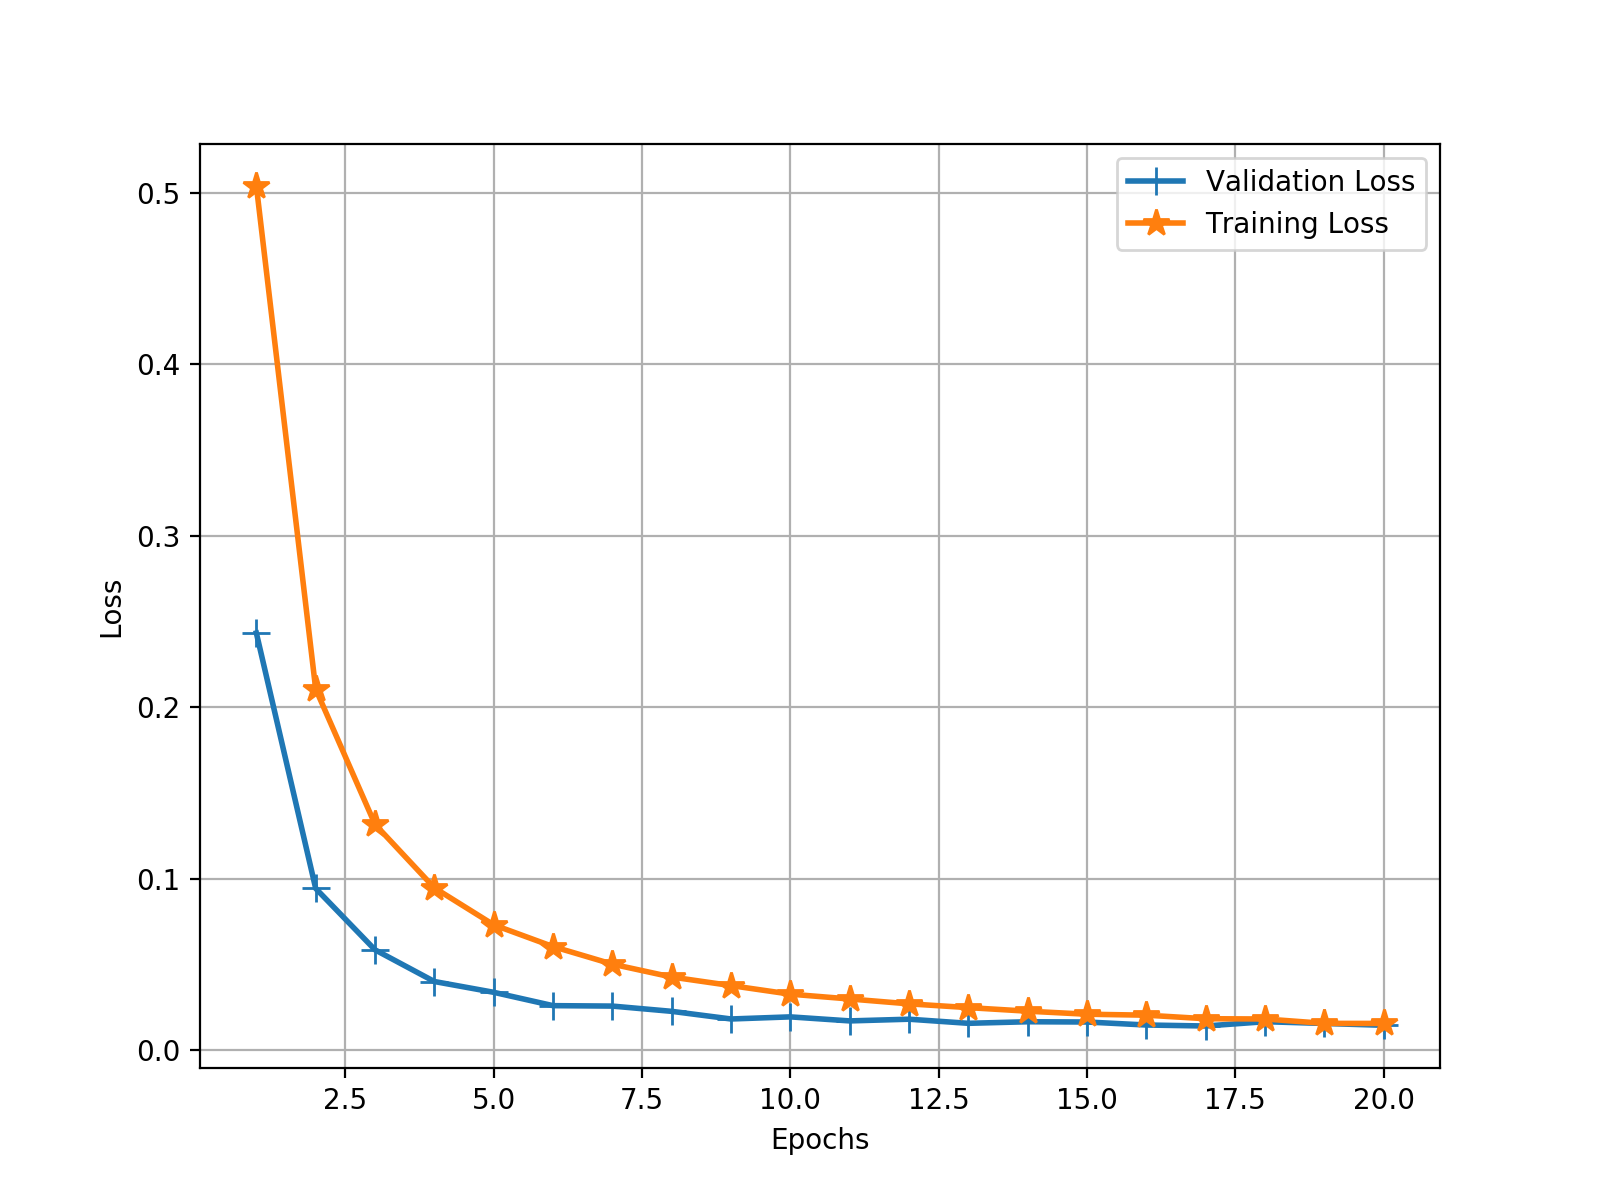

In [13]:
# 模型复杂度图表
history_dict = hist.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoches = range(1, epochs+1)

fig = plt.figure(figsize=(8, 6))

line1 = plt.plot(epoches, val_loss_values, label='Validation Loss')
line2 = plt.plot(epoches, loss_values, label='Training Loss')

plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


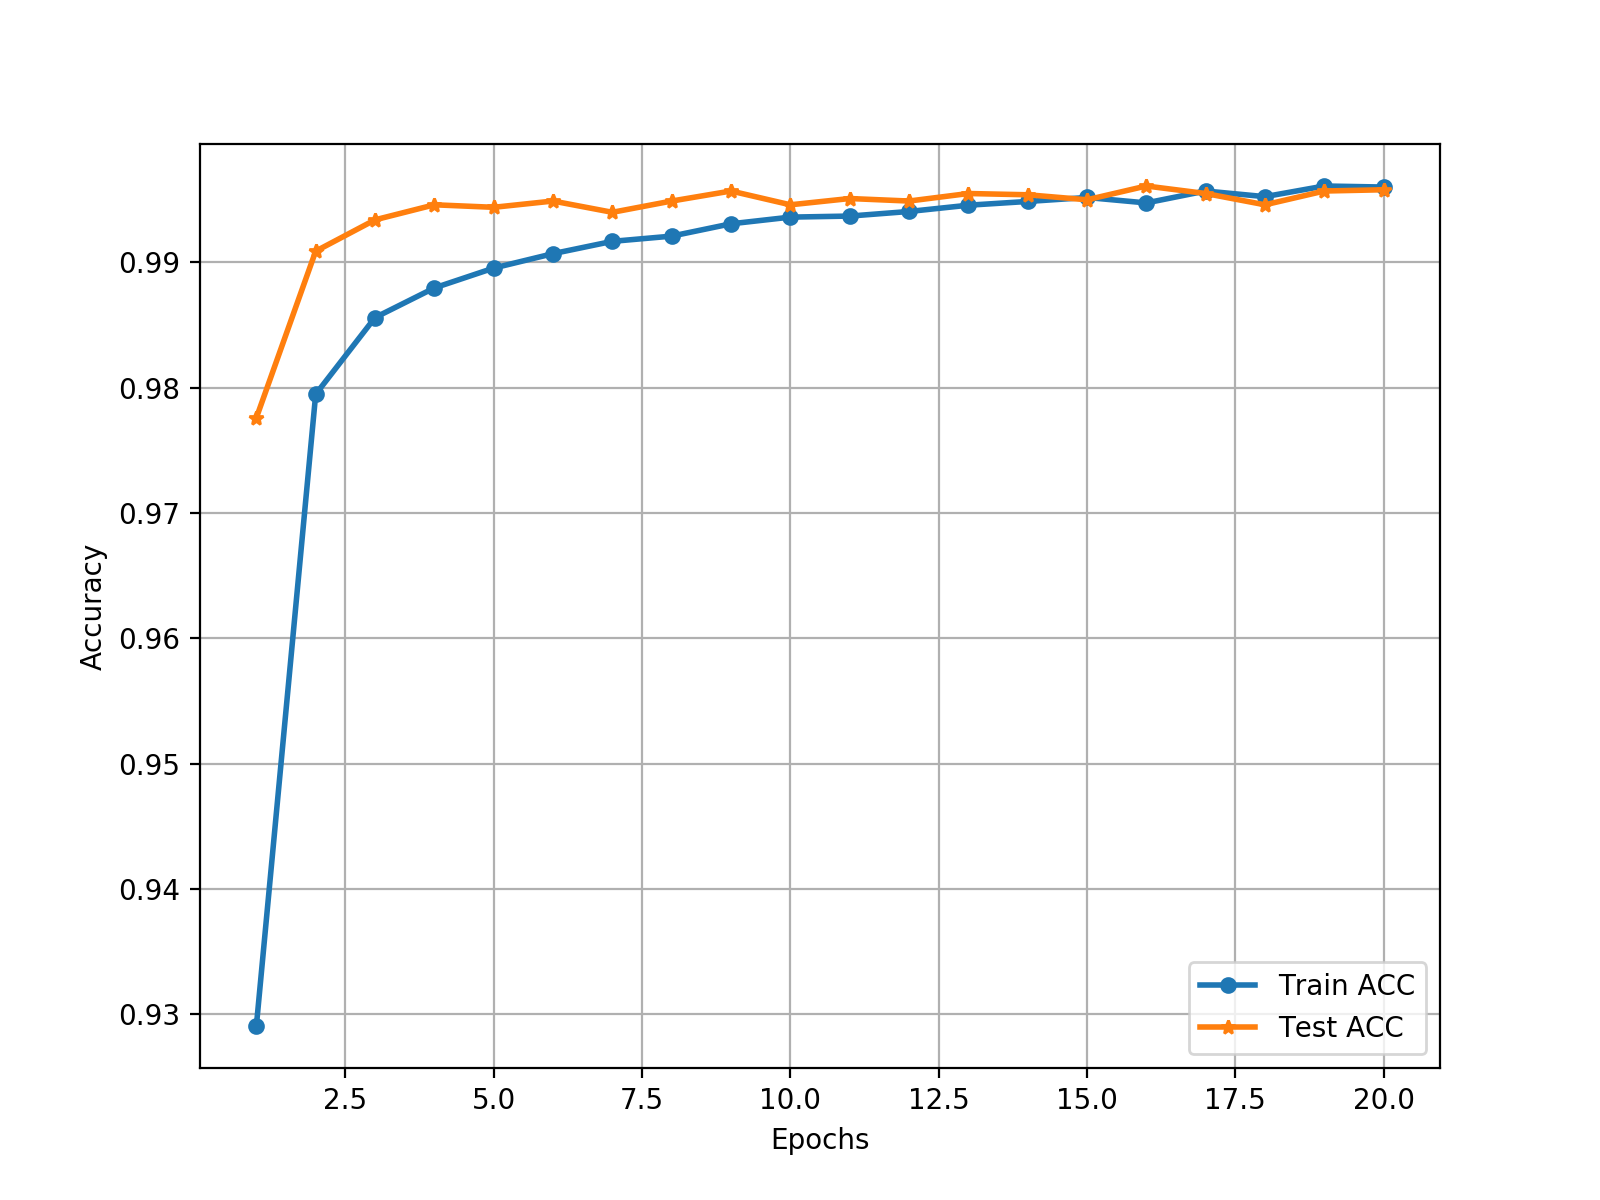

In [14]:
# 精确度图表
train_acc = history_dict["accuracy"]
test_acc = history_dict["val_accuracy"]
epoches = range(1, epochs+1)

fig = plt.figure(figsize=(8, 6))
line1 = plt.plot(epoches, train_acc, label="Train ACC")
line2 = plt.plot(epoches, test_acc, label="Test ACC")

plt.setp(line1, linewidth=2.0, marker='o', markersize=5.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=5.0)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# 7、测试模型

In [15]:
# 测试模型
scores = model.evaluate(x_test, y_test, batch_size=batch_size)
print("test loss", scores[0])
print("test accuracy", scores[1])

10000/10000 [==============================] - 3s 308us/step
test loss 0.014528003074321895
test accuracy 0.9958000183105469


# 8、保存模型

In [16]:
# 保存模型
model.save("mnist_simple_cnn.h5")

# 9、加载保存的模型

In [17]:
from keras.models import load_model
# 加载模型
classifier = load_model("mnist_simple_cnn.h5")
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)       

# 10、使用加载的模型进行预测

In [18]:
# 读取图片
image = cv2.imread("test.png")
# cv2.imshow("image", image)
# cv2.waitKey(0)

# 灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 高斯模糊
blured = cv2.GaussianBlur(gray, (5, 5), 0)


# Candy边缘提取
edged = cv2.Canny(blured, 30, 150)


# 提取轮廓
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(contours)

for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    #     if w >= 5 and h >= 25:
    # 提取数字
    roi = cv2.resize(gray[y - 20:y + h + 20, x - 20:x + w + 20], (28, 28))
    roi = 255 - roi  # 转换为黑色背景
    cv2.imshow("ROI", roi)
    cv2.waitKey(0)
    # 处理图片
    roi = roi / 255.0
    roi = roi.reshape(1, 28, 28, 1)

    # 预测图片
    res = model.predict_classes(roi, 1, verbose=0)[0]
    print(res)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0))
    cv2.putText(image, str(res), (x + 10, y + 200), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 255, 0), 2)
    cv2.imshow("image", image)

    cv2.waitKey(0)

cv2.destroyAllWindows()

3


# 11、优化模型

数据增强

深度优于广度 https://cs.uwaterloo.ca/~mli/Deep-Learning-2017-Lecture8WhyDeep.ppt

# 12、可视化

In [19]:
# 获取模型的每一层，卷积层，全连接层，激活层，池化层，BatchNormalization
layers = model.layers
# len(layers) # 24

# 获取卷积层的名称和输出变量
layers_names = []
layers_output = []
for layer in layers:
    if 'conv2d' in layer.output.name:
        layers_names.append(layer.output.name)
        layers_output.append(layer.output)

# 分层获取模型输出
layers_model = keras.models.Model(inputs=model.input, outputs=layers_output)

outputs = layers_model.predict(x_test[1].reshape(1,28,28,1))
first_layer_output = outputs[0]
first_layer_output.shape # 获取第一层的输出

(1, 26, 26, 32)

<IPython.core.display.Javascript object>


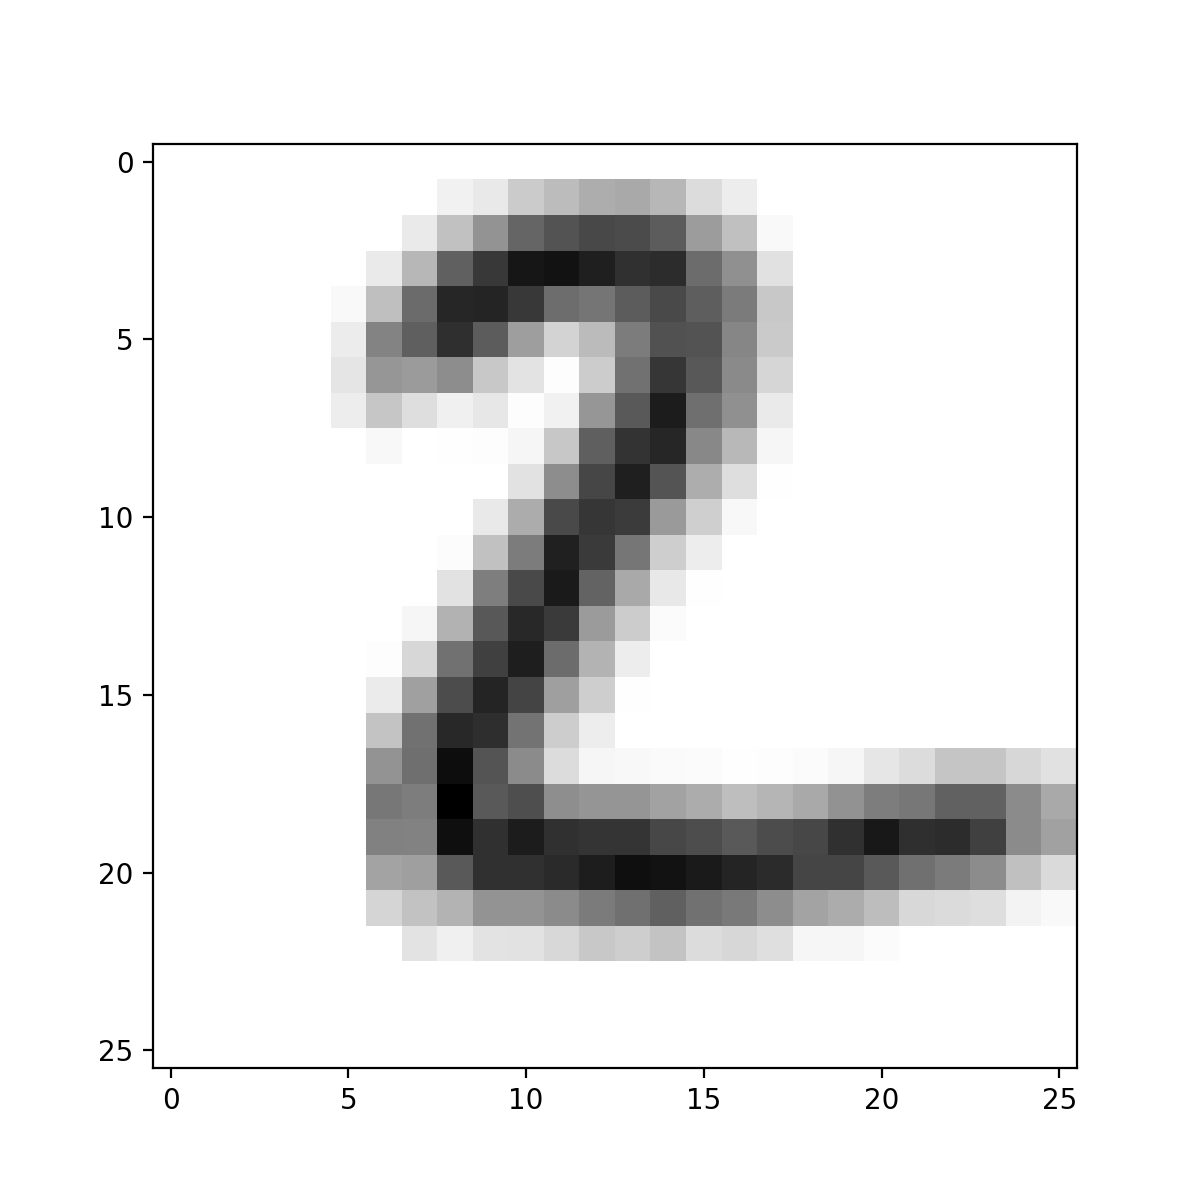

In [20]:
# 可视化一个特征图
fig = plt.figure(figsize=(6, 6))
plt.imshow(first_layer_output[0, :, :, 1], cmap=plt.get_cmap('gray'))
plt.show()

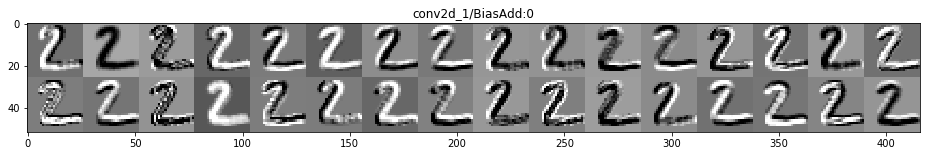

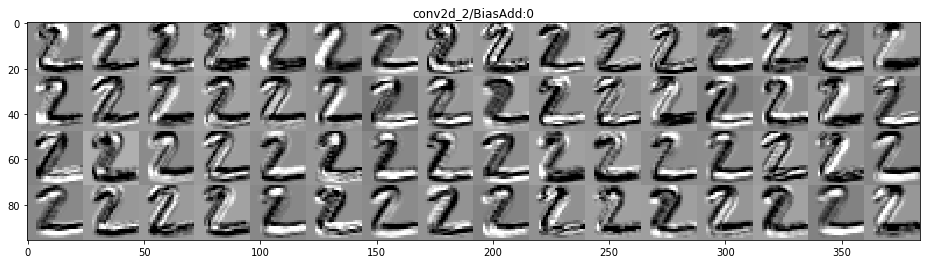

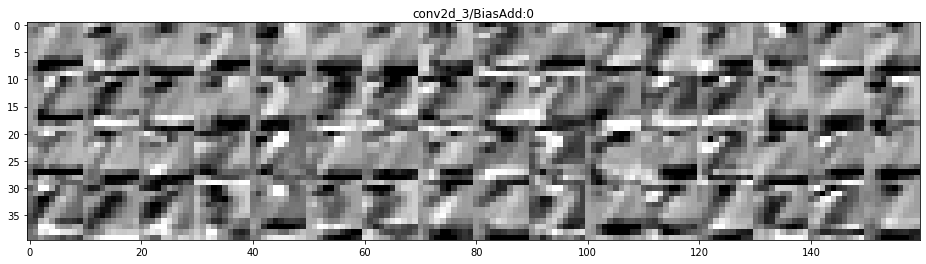

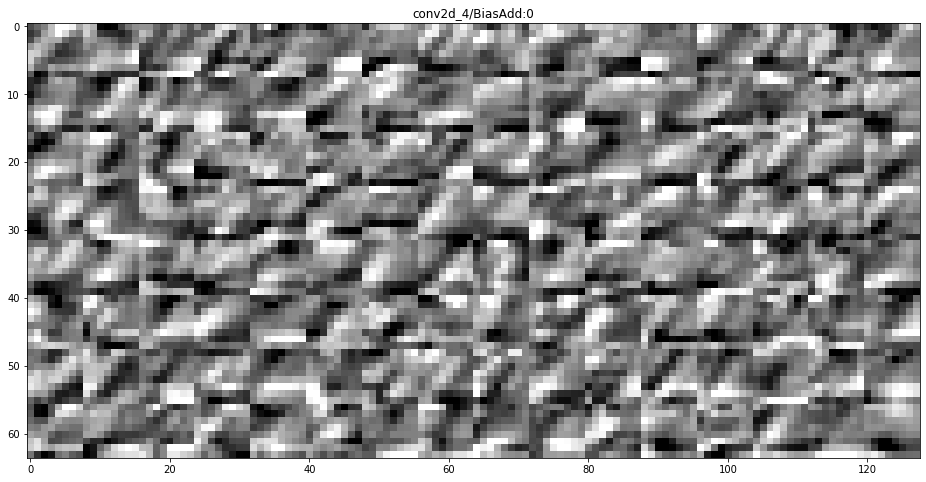

In [21]:
%matplotlib inline

# 按卷积层可视化
        
images_per_row = 16        

for layer_name, output in zip(layers_names,outputs):
    n_features = output.shape[-1]
    size = output.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = output[0,:, :,col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')
